In [9]:
#Loading Libraries
#Essentail Libraries
import numpy as np
import pandas as pd
import re

#Visualizaiotn 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from wordcloud import WordCloud

#NLP Libraries
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from gensim.models import Word2Vec
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import spacy
!python -m spacy download en_core_web_md -q

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [1]:
texts = [

    # Tech News 

    """

    TechCorp, a leading tech company based in New York, announced on Monday that CEO Jane Doe plans to introduce a new AI-powered smartphone.

    The device, named 'Nexus X,' will debut in Paris next month. Meanwhile, critics like Dr. Mark Smith argue that the launch could impact environmental policies.

    The company also partnered with HealthOrg, a nonprofit, to promote digital wellness. Apple declined to comment on the news.

    The event will coincide with the Global Tech Summit 2024.

    """,

 

    # Sports News

    """

    Lionel Messi, the Argentine footballer, signed a $20 million contract with Miami FC on July 15, 2023.

    The deal was announced during a press conference at Hard Rock Stadium in Florida.

    Fans from across South America flooded social media to celebrate the move.

    """,

 

    # Politics

    """

    President John Harper met with German Chancellor Angela Weber in Berlin last Friday to discuss NATO policies.

    The United Nations will host a climate summit in Geneva, Switzerland, in December 2025.

    Critics warn that the new tax law (HB 1420) might face delays in Congress.

    """,

 

    # Science/Literature

    """

    Marie Curie, born in Warsaw in 1867, discovered radium and won the Nobel Prize in Chemistry in 1911.

    In "The Great Gatsby," Jay Gatsby hosts lavish parties in West Egg, New York, reflecting the excesses of the Jazz Age.

    A recent study in Nature Journal links sleep deprivation to decreased cognitive performance.

    """

]

In [5]:
#Applying preprocessing for the text -> remove tags/url/html -> lower -> remove stopwords -> stemming
snow = SnowballStemmer('english')
stwd = stopwords.words('english')
def pre_precess(text):
    ans = []
    # 1. Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)
    # 2. Remove URLs
    text = re.sub(r'http\S+|www\.\S+', '', text)
    # 3. Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    words = word_tokenize(text)
    for word in words:
        if word not in stwd:
            if snow:
                ans.append(snow.stem(word))
    cleaned_text = ' '.join(ans)
    
    return cleaned_text            

cleaned_full_txt = []
for text in texts:
    cleaned_full_txt.append(pre_precess(text))

print(cleaned_full_txt[0])

techcorp lead tech compani base new york announc monday ceo jane doe plan introduc new aipow smartphon devic name nexus x debut pari next month meanwhil critic like dr mark smith argu launch could impact environment polici compani also partner healthorg nonprofit promot digit well appl declin comment news event coincid global tech summit


In [20]:
#Loading package for tagging and labeling
nlp = spacy.load('en_core_web_md')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [23]:
#labeling each word in every sentence
docs = []
for text in cleaned_full_txt:
    docs.append(nlp(text))
for doc in docs:
    for ent in doc.ents:
        print(ent.text, ent.label_)
    print('\n')    

techcorp ORG
new york GPE
monday DATE
jane GPE
introduc ORG
aipow smartphon devic PERSON
next month DATE
meanwhil PERSON
dr mark smith argu PERSON
healthorg nonprofit ORG
declin ORG


lionel messi argentin PERSON
million CARDINAL
miami GPE
florida GPE
south america LOC


presid john harper PERSON
german NORP
angela weber PERSON
berlin GPE
last friday DATE
nato polici unit ORG
switzerland GPE
decemb ORG
congress ORG


mari curi PERSON
warsaw discov PERSON
new york GPE
depriv decreas cognit PERSON




In [37]:
tag_docs = []
for text in cleaned_full_txt:
    tag_docs.append(nlp(text))
for doc in tag_docs:
    for token in doc:
        print(token.text, token.pos_)
    print('\n')  

techcorp PROPN
lead PROPN
tech PROPN
compani PROPN
base NOUN
new PROPN
york PROPN
announc PROPN
monday PROPN
ceo PROPN
jane PROPN
doe PROPN
plan VERB
introduc X
new ADJ
aipow PROPN
smartphon PROPN
devic NOUN
name NOUN
nexus NOUN
x PROPN
debut PROPN
pari PROPN
next ADJ
month NOUN
meanwhil PROPN
critic NOUN
like SCONJ
dr PROPN
mark PROPN
smith PROPN
argu PROPN
launch PROPN
could AUX
impact VERB
environment NOUN
polici PROPN
compani PROPN
also ADV
partner VERB
healthorg PROPN
nonprofit PROPN
promot PROPN
digit PROPN
well ADV
appl VERB
declin PROPN
comment NOUN
news NOUN
event NOUN
coincid NOUN
global PROPN
tech PROPN
summit NOUN


lionel PROPN
messi PROPN
argentin PROPN
footbal PROPN
sign VERB
million NUM
contract NOUN
miami PROPN
fc PROPN
juli PROPN
deal PROPN
announc PROPN
press NOUN
confer NOUN
hard ADJ
rock NOUN
stadium NOUN
florida PROPN
fan PROPN
across ADP
south PROPN
america PROPN
flood PROPN
social ADJ
media NOUN
celebr ADJ
move NOUN


presid PROPN
john PROPN
harper PROPN
met VER

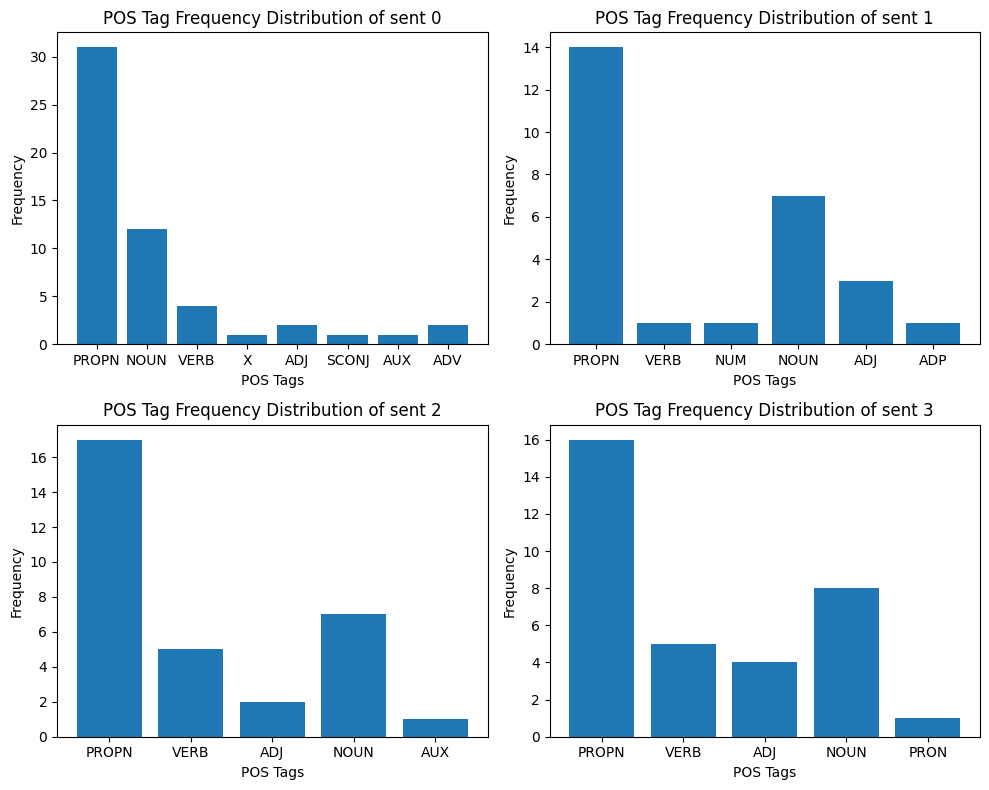

In [49]:
from collections import Counter
#plotting the frequencies of each senitence
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

# Plot POS tag frequency
for i, ax in enumerate(axs):
    tags = [token.pos_ for token in tag_docs[i]]
    tag_counts = Counter(tags)
    ax.bar(tag_counts.keys(), tag_counts.values())
    ax.set_title(f"POS Tag Frequency Distribution of sent {i}")
    ax.set_xlabel("POS Tags")
    ax.set_ylabel("Frequency")

# Adjust layout to prevent overlap
plt.tight_layout()


In [67]:
#Counting Pairs
NV = 0
AN = 0
AV = 0
JJ = 0
for j in range(4):
    sent = tag_docs[j]
    for i in range(len(tag_docs[j])-1):
        if sent[i].pos_ == 'NOUN' and sent[i+1].pos_ == 'VERB':
            NV +=1
            print(f'The sentence No.{j+1} have {sent[i].text , sent[i+1].text} which is NOUN VERB Pair, CNT = {NV}')
        elif sent[i].pos_ == 'ADJ' and sent[i+1].pos_ == 'NOUN':
            AN +=1
            print(f'The sentence No.{j+1} have {sent[i].text , sent[i+1].text} which is ADJ NOUN Pair, CNT = {AN}')
        elif sent[i].pos_ == 'ADV' and sent[i+1].pos_ == 'VERB':
            AV+=1
            print(f'The sentence No.{j+1} have {sent[i].text , sent[i+1].text} which is ADV VERB Pair, CNT = {AV}')
        elif sent[i].pos_ == 'ADJ' and sent[i+1].pos_ == 'ADJ':
            JJ +=1
            print(f'The sentence No.{j+1} have {sent[i].text , sent[i+1].text} which is ADJ ADJ Pair, CNT = {JJ}')    
        

The sentence No.1 have ('next', 'month') which is ADJ NOUN Pair, CNT = 1
The sentence No.1 have ('also', 'partner') which is ADV VERB Pair, CNT = 1
The sentence No.1 have ('well', 'appl') which is ADV VERB Pair, CNT = 2
The sentence No.2 have ('hard', 'rock') which is ADJ NOUN Pair, CNT = 2
The sentence No.2 have ('social', 'media') which is ADJ NOUN Pair, CNT = 3
The sentence No.2 have ('celebr', 'move') which is ADJ NOUN Pair, CNT = 4
The sentence No.3 have ('critic', 'warn') which is NOUN VERB Pair, CNT = 1
The sentence No.3 have ('new', 'tax') which is ADJ NOUN Pair, CNT = 5
The sentence No.4 have ('great', 'gatsbi') which is ADJ NOUN Pair, CNT = 6
The sentence No.4 have ('lavish', 'parti') which is ADJ NOUN Pair, CNT = 7
The sentence No.4 have ('excess', 'jazz') which is ADJ NOUN Pair, CNT = 8


In [68]:
print("The most frequently appearing pair is the Adjective noun pair")

The most frequently appearing pair is the Adjective noun pair


In [69]:
pos_tags_spacy = [(token.text, token.pos_) for token in tag_docs[0]]

df = pd.DataFrame(pos_tags_spacy, columns=['Token', 'POS_Tag'])

# Save to CSV
df.to_csv('tagged_dataset.csv', index=False)
df

,Token,POS_Tag
0,techcorp,PROPN
1,lead,PROPN
2,tech,PROPN
3,compani,PROPN
4,base,NOUN
5,new,PROPN
6,york,PROPN
7,announc,PROPN
8,monday,PROPN
9,ceo,PROPN
